In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
path = "/Users/hugojosebello/Documents/git-repos/data-tuning-scripts-v2/r_scripts_analysis/all.csv"

In [6]:
df_asoc = pd.read_csv(path, sep=";")
df_asoc["month"]= pd.to_datetime(df_asoc["month"])
df_asoc=df_asoc.set_index("month")
df_asoc
df_asoc['sentiment_analysis_score_diff'] = df_asoc['sentiment_analysis_score'] - df_asoc['sentiment_analysis_score'].shift(1)
df_asoc['suicidios_diff'] = df_asoc['suicidios'] - df_asoc['suicidios'].shift(1)


,noticias_suicidio,media_sentimiento_noticias,sentiment_analysis_score,mes,descrip,suicidios,Menores_de_15_anos,De_15_a_29_anos,De_30_a_39_anos,De_40_a_44_anos,...,De_55_a_59_anos,De_60_a_64_anos,De_65_a_69_anos,De_70_a_74_anos,De_75_a_79_anos,De_80_a_84_anos,De_85_a_89_anos,De_90_a_94_anos,De_95_anos_y_mns,Unnamed:_18
month,,,,,,,,,,,,,,,,,,,,,
2005-01-01,195,-0.011282,-9.533333,2005-01-01,Ambos sexos,285.0,0.0,32.0,47.0,18.0,...,22.0,20.0,13.0,29.0,30.0,17.0,10.0,6.0,0.0,NaN
2005-02-01,151,-0.009934,-12.324503,2005-02-01,Ambos sexos,255.0,0.0,33.0,43.0,27.0,...,22.0,11.0,14.0,20.0,15.0,17.0,13.0,7.0,0.0,NaN
2005-03-01,184,-0.009076,-9.195652,2005-03-01,Ambos sexos,302.0,1.0,47.0,50.0,20.0,...,17.0,22.0,18.0,29.0,24.0,16.0,2.0,3.0,1.0,NaN
2005-04-01,131,-0.011145,-8.732824,2005-04-01,Ambos sexos,307.0,2.0,41.0,48.0,20.0,...,19.0,25.0,22.0,25.0,25.0,16.0,9.0,8.0,1.0,NaN
2005-05-01,165,-0.011333,-10.933333,2005-05-01,Ambos sexos,304.0,2.0,35.0,58.0,27.0,...,23.0,15.0,20.0,23.0,25.0,19.0,12.0,3.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-01,143,-0.009301,-10.811189,2017-08-01,Ambos sexos,337.0,1.0,24.0,40.0,32.0,...,35.0,24.0,18.0,23.0,23.0,20.0,24.0,7.0,1.0,NaN
2017-09-01,171,-0.016491,-18.619883,2017-09-01,Ambos sexos,307.0,1.0,26.0,37.0,27.0,...,35.0,15.0,18.0,16.0,13.0,21.0,14.0,6.0,1.0,NaN
2017-10-01,189,-0.013704,-17.216931,2017-10-01,Ambos sexos,346.0,1.0,27.0,45.0,29.0,...,39.0,17.0,28.0,29.0,19.0,21.0,19.0,4.0,1.0,NaN


In [4]:
granger_test = sm.tsa.stattools.grangercausalitytests(df_asoc[['sentiment_analysis_score','suicidios']], maxlag=8, verbose=True)
print(granger_test)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9212  , p=0.0895  , df_denom=152, df_num=1
ssr based chi2 test:   chi2=2.9788  , p=0.0844  , df=1
likelihood ratio test: chi2=2.9506  , p=0.0858  , df=1
parameter F test:         F=2.9212  , p=0.0895  , df_denom=152, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7990  , p=0.1690  , df_denom=149, df_num=2
ssr based chi2 test:   chi2=3.7187  , p=0.1558  , df=2
likelihood ratio test: chi2=3.6745  , p=0.1593  , df=2
parameter F test:         F=1.7990  , p=0.1690  , df_denom=149, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4688  , p=0.2255  , df_denom=146, df_num=3
ssr based chi2 test:   chi2=4.6176  , p=0.2020  , df=3
likelihood ratio test: chi2=4.5493  , p=0.2079  , df=3
parameter F test:         F=1.4688  , p=0.2255  , df_denom=146, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9854  , p=0.0999  

In [21]:
granger_test = sm.tsa.stattools.grangercausalitytests(df_asoc[['sentiment_analysis_score_diff','suicidios_diff']].dropna(), maxlag=8, verbose=True)
print(granger_test)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0673  , p=0.0819  , df_denom=151, df_num=1
ssr based chi2 test:   chi2=3.1282  , p=0.0769  , df=1
likelihood ratio test: chi2=3.0969  , p=0.0784  , df=1
parameter F test:         F=3.0673  , p=0.0819  , df_denom=151, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8677  , p=0.1581  , df_denom=148, df_num=2
ssr based chi2 test:   chi2=3.8615  , p=0.1450  , df=2
likelihood ratio test: chi2=3.8136  , p=0.1486  , df=2
parameter F test:         F=1.8677  , p=0.1581  , df_denom=148, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5234  , p=0.2109  , df_denom=145, df_num=3
ssr based chi2 test:   chi2=4.7909  , p=0.1878  , df=3
likelihood ratio test: chi2=4.7169  , p=0.1937  , df=3
parameter F test:         F=1.5234  , p=0.2109  , df_denom=145, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8012  , p=0.1319  

In [10]:
from statsmodels.tsa.stattools import adfuller

def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)

    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")

#apply adf test on the series
adf_test(df_asoc["sentiment_analysis_score"])
adf_test(df_asoc["suicidios"])


Test Statistic         -9.855145e+00
p-value                 4.379617e-17
# Lags                  0.000000e+00
# Observations          1.550000e+02
Critical Value (1%)    -3.473259e+00
Critical Value (5%)    -2.880374e+00
Critical Value (10%)   -2.576812e+00
dtype: float64
 Series is Stationary
Test Statistic           -1.096774
p-value                   0.716357
# Lags                   11.000000
# Observations          144.000000
Critical Value (1%)      -3.476598
Critical Value (5%)      -2.881829
Critical Value (10%)     -2.577589
dtype: float64
 Series is Non-Stationary


In [19]:
kpss_output = {}
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

kpss_test(df_asoc["sentiment_analysis_score"])
kpss_test(df_asoc["suicidios"])


df_asoc.dropna()
print("_------")
kpss_test(df_asoc["sentiment_analysis_score_diff"].dropna())
kpss_test(df_asoc["suicidios_diff"].dropna())
print("_------")

adf_test(df_asoc["sentiment_analysis_score_diff"].dropna())
adf_test(df_asoc["suicidios_diff"].dropna())


#https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/

#

Results of KPSS Test:
Test Statistic            0.615788
p-value                   0.021201
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Results of KPSS Test:
Test Statistic            0.529703
p-value                   0.034977
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
_------
Results of KPSS Test:
Test Statistic            0.051968
p-value                   0.100000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Results of KPSS Test:
Test Statistic            0.097583
p-value                   0.100000
Lags Used                14.000000
Critical Value (10%

/Users/hugojosebello/.local/share/virtualenvs/data-tuning-scripts-v2-RwdOpR44/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/Users/hugojosebello/.local/share/virtualenvs/data-tuning-scripts-v2-RwdOpR44/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either 

/Users/hugojosebello/.local/share/virtualenvs/data-tuning-scripts-v2-RwdOpR44/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


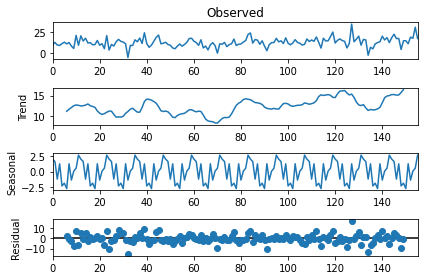

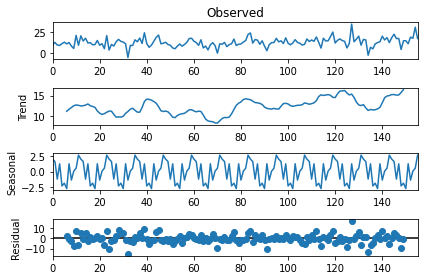

In [22]:
from fbprophet import Prophet
import pandas as pd
import altair as alt
from IPython.display import HTML
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(-df_asoc[["sentiment_analysis_score"]].values, model='additive', freq=12)
result.plot()

/Users/hugojosebello/.local/share/virtualenvs/data-tuning-scripts-v2-RwdOpR44/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


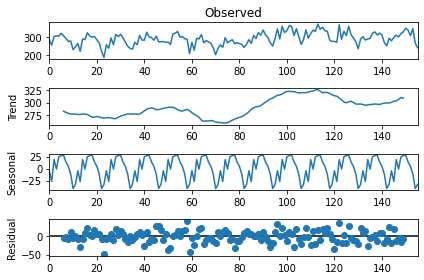

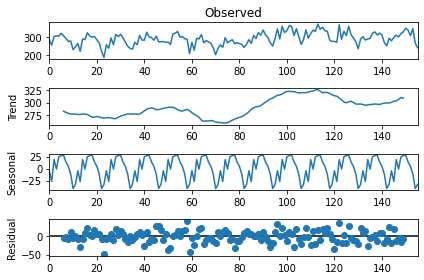

In [9]:
result = seasonal_decompose(df_asoc[["suicidios"]].values, model='additive', freq=12)
result.plot()

